Trabajo presentado por:
https://github.com/estefanoandre/Final/

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import requests

In [16]:
url="https://www.animalgenome.org/cgi-bin/QTLdb/OA/traitmap?trait_ID=3039"
uclient=urlopen(url) # Abre el URL en formato codigo
pagehtml=uclient.read() # Transforma a formato texto
uclient.close() # Una vez leido el archivo lo cierra
print(pagehtml)

b'<HTML>\n<HEAD><TITLE>Sheep QTL Database</title>\n<STYLE TYPE="text/css"><!--\nP { font-size:9pt;\n    color:navy;\n    font-family:sans-serif,arial,verdana,helvetica; }\nINPUT  { font-size:8pt;\n         color:navy;\n\t font-family:sans-serif,arial,verdana,helvetica; }\n-->\n</STYLE>\n</HEAD>\n\n<BODY bgcolor="#FfFffF" text="#0000A0" link="#0000FF" vlink="#0069E1" alink="008840">\n<TABLE border=0 cellspacing=0 cellpadding=0 style=\'width:98%;background:url("/QTLdb/images/titlebar_bg.jpg");\'\n <TR><TD align=left style="padding:2px;"><a href="/QTLdb/sheep"><img src="/QTLdb/images/sheepQTLdbsm.gif"></a>\n \n </TD><TD align=\'right\' style=\'padding:0 6px\'>\n \n <FORM NAME=highlight style="margin:0px;">\n <TABLE border=0 cellspacing=2 cellpadding=0 align=right><TR>\n <TD onmouseover="this.style.background=\'yellow\'" onmouseout="this.style.background=\'\'">\n <INPUT TYPE="button" VALUE="Browse" onClick="location.href=\'browse\'">\n </TD><TD onmouseover="this.style.background=\'yellow\'

In [17]:
urls=[] # crea una lista vacia
pagesoup=soup(pagehtml, "html.parser") # crea un árbol de objetos que representan al documento HTML
c=pagesoup.findAll("area",{"shape":"rect"}) # de la clase 'area', extrae solo los que contienen a de 'shape' hasta 'rect' en conjunto
print(type(c))
for i in range(0,110):
    print(c[i]["href"]) # imprime el contenido de 'href'
    if c[i]["href"][0:8]=="qdetails": # En 'href' filtra a los que en sus primeros 8 caracteres contengan a 'qdetails'
       urls.append("https://www.animalgenome.org/cgi-bin/QTLdb/OA/"+c[i]["href"])
# Finalmente agrega dichos links encontrados a la lista

<class 'bs4.element.ResultSet'>
chromap?chromos=X&trait_ID=3039&trait_ID=3039
chromap?chromos=X&trait_ID=3039
chromap?chromos=1&trait_ID=3039&trait_ID=3039
chromap?chromos=1&trait_ID=3039
qdetails?QTL_ID=13827
qdetails?QTL_ID=13830
qdetails?QTL_ID=13832
qdetails?QTL_ID=57709
chromap?chromos=2&trait_ID=3039&trait_ID=3039
chromap?chromos=2&trait_ID=3039
qdetails?QTL_ID=13992
qdetails?QTL_ID=14147
qdetails?QTL_ID=57681
qdetails?QTL_ID=57684
qdetails?QTL_ID=57718
chromap?chromos=3&trait_ID=3039&trait_ID=3039
chromap?chromos=3&trait_ID=3039
qdetails?QTL_ID=13996
qdetails?QTL_ID=57740
chromap?chromos=4&trait_ID=3039&trait_ID=3039
chromap?chromos=4&trait_ID=3039
qdetails?QTL_ID=193115
chromap?chromos=5&trait_ID=3039&trait_ID=3039
chromap?chromos=5&trait_ID=3039
chromap?chromos=6&trait_ID=3039&trait_ID=3039
chromap?chromos=6&trait_ID=3039
qdetails?QTL_ID=13672
qdetails?QTL_ID=13818
qdetails?QTL_ID=13820
qdetails?QTL_ID=14246
qdetails?QTL_ID=170586
chromap?chromos=7&trait_ID=3039&trait_ID=3039


In [18]:
print(urls)
len(urls) # hay 56 links con esas caracteristicas

['https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=13827', 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=13830', 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=13832', 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=57709', 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=13992', 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=14147', 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=57681', 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=57684', 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=57718', 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=13996', 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=57740', 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=193115', 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=13672', 'https://www.animalgenome.org/cgi-bin/QTLdb/OA/qdetails?QTL_ID=13818', 'htt

56

In [28]:
QTL_ID=[]
CHROMOSOME=[]
CENTER_CM=[]
RANGE_CM=[]
RANGE_MBP=[]
SIGNIFICANCE=[]
PUBLICATION=[]
DOI=[]
RACE=[]
PAIS =[]
GENE_ASOCIATE=[]


for i in urls:
    url=str(i) # convierte el primer link en una linea de texto
    uclient=urlopen(url) # abre el url en formato coigo
    pagehtml=uclient.read()  # transforma la url en formato texto
    uclient.close() # Cierra la variable 
    pagesoup=soup(pagehtml, "html.parser") # crea un árbol de objetos que se representa en HTML
    
    qtl_id=pagesoup.find("td",{"colspan":"2"}).h2.text[4:11] # busca la clase 'td' con la etiqueta 'colspan = 2' busca la etiqueta h2 e imprime del cuarto al 11vo elemento
    
    table=pagesoup.find("table",{"bordercolor":"#F5F5cC"}) # Busca la etiqueta table, y contenga el bordercolor = '#F5F5cC' y  alamacena su contenido
    table2=pagesoup.find("table",{"bordercolor":"#feddfe"}) # Busca la etiqueta table, y contenga el bordercolor = '#feddfe' y  alamacena su contenido
    table3=pagesoup.find("table",{"bordercolor":"#E8e8Ff"}) # Busca la etiqueta table, y contenga el bordercolor = '#E8e8Ff' y alamacena su contenido
    
    ranges=table.findAll("td")[5].text # Alamacena en un formato texto al 5to elemento de la clase 'td'

    for i in range(0,len(ranges)):
        if ranges[i:i+4]=="(cM)":
            RANGE_CM.append(ranges[0:i+4]) # Agrega al dato de Distancia genética 
            RANGE_MBP.append(ranges[i+4:len(ranges)]) # Agrega su posicion fisica
            
    a=table3.findAll("tr")[2].findAll("td")[1].text.split() # de la table3 busca la clase 'tr' y en la segunda etiqueta busca a los 
    # elementos de la clase 'td' el primer parrafo lo imprime en ua linea de texto 
    print(a)
    # filtra y selecciona los elementos requeridos
    QTL_ID.append(qtl_id)
    CHROMOSOME.append(table.findAll("td")[1].text)
    CENTER_CM.append(table.find("td",{"width":"120"}).text)
    SIGNIFICANCE.append(table.findAll("td")[26].text)
    RACE.append(table2.findAll("tr")[2].div.a.text)
    PAIS.append(a[len(a)-1])
    GENE_ASOCIATE.append(table.findAll("tr")[17].findAll("td")[1].text)

['Departamento', 'de', 'Mejora', 'Genética', 'Animal,', 'INIA,', '28040', 'Madrid,', 'Spain']
['Unidad', 'de', 'Tecnologia', 'en', 'Produccion', 'Animal,', 'CITA-Gobierno', 'de', 'Aragon,', 'Zaragoza,', 'Spain']
['Unidad', 'de', 'Tecnologia', 'en', 'Produccion', 'Animal,', 'CITA-Gobierno', 'de', 'Aragon,', 'Zaragoza,', 'Spain']
['Departmento', 'Producción', 'Animal,', 'Universidad', 'de', 'León,', 'León,', 'Spain']
['ReproGen', '-', 'Animal', 'Bioscience', 'Group,', 'Faculty', 'of', 'Veterinary', 'Science,', 'University', 'of', 'Sydney,', 'Camden', 'NSW', '2570,', 'Australia']
['Department', 'of', 'Animal', 'Science,', 'Oklahoma', 'State', 'University,', 'Stillwater,', 'OK', '74078,', 'USA']
['Departmento', 'Producción', 'Animal,', 'Universidad', 'de', 'León,', 'León,', 'Spain']
['Departmento', 'Producción', 'Animal,', 'Universidad', 'de', 'León,', 'León,', 'Spain']
['Departamento', 'de', 'Producción', 'Animal,', 'Facultad', 'de', 'Veterinaria,', 'Universidad', 'de', 'León,', '24071', 

In [24]:
print(QTL_ID) #ID de los links
print(CHROMOSOME) # Distancia genetica (cromosoma)
print(CENTER_CM) # indica si la Distancia genetica es Significativa o sujestiva 
print(SIGNIFICANCE) # Procedencia de la significancia
print(RACE) # Indica el tipo de raza
print(PAIS) # El pais de procedencia
print(GENE_ASOCIATE) # Asociado de genes
#data frame:
index=list(range(1,57))
df=pd.DataFrame({"ID":QTL_ID,"CHROMOSOME":CHROMOSOME,"CENTER_CM":CENTER_CM,"SIGNIFICANCE":SIGNIFICANCE,"RAZA":RACE,"PAIS":PAIS,"GENE_ASOCIATE":GENE_ASOCIATE}, index)
print(df)


['#13827 ', '#13830 ', '#13832 ', '#57709 ', '#13992 ', '#14147 ', '#57681 ', '#57684 ', '#57718 ', '#13996 ', '#57740 ', '#193115', '#13672 ', '#13818 ', '#13820 ', '#14246 ', '#170586', '#57745 ', '#13985 ', '#16017 ', '#37589 ', '#37592 ', '#14148 ', '#57690 ', '#57749 ', '#170593', '#170594', '#170597', '#170598', '#14190 ', '#170601', '#170602', '#170604', '#170605', '#14186 ', '#57696 ', '#57730 ', '#57752 ', '#170609', '#57756 ', '#14149 ', '#14150 ', '#14192 ', '#14193 ', '#57732 ', '#170613', '#170616', '#14006 ', '#14151 ', '#193118', '#170221', '#57763 ', '#13906 ', '#14008 ', '#14152 ', '#170222']
['1', '1', '1', '1', '2', '2', '2', '2', '2', '3', '3', '4', '6', '6', '6', '6', '6', '7', '9', '11', '11', '11', '12', '12', '13', '13', '13', '13', '13', '14', '14', '14', '14', '14', '15', '16', '16', '16', '16', '17', '18', '18', '18', '18', '19', '19', '19', '20', '20', '20', '21', '22', '23', '24', '24', '26']
['96.42 (cM)', '128.2 (cM)', '124.3 (cM)', '0.00 (cM)', '206 (cM)

In [21]:
#Convirtiendolo a csv
df.to_csv("Animalgenome.csv") # almacena el data.frame en un archivo csv con nombre de Animalgenome

In [29]:
# procesando el csv:
import pandas as pd
Agenome = pd.read_csv("Animalgenome.csv",skiprows=1 ,           
                 names=['N°', "ID","CHROMOSOME","CENTER_CM","SIGNIFICANCE","RAZA","PAIS","GENE_ASOCIATE"],
                 index_col='N°')
Agenome

,ID,CHROMOSOME,CENTER_CM,SIGNIFICANCE,RAZA,PAIS,GENE_ASOCIATE
N°,,,,,,,
1,#13827,1,96.42 (cM),Significant,Manchega,Spain,NaN
2,#13830,1,128.2 (cM),Significant,Manchega,Spain,NaN
3,#13832,1,124.3 (cM),Significant,Manchega,Spain,NaN
4,#57709,1,0.00 (cM),Significant,Spanish Churra,Spain,NaN
5,#13992,2,206 (cM),Suggestive,Awassi,Australia,NaN
6,#14147,2,238.81 (cM),Significant,Dorset,USA,NaN
7,#57681,2,0.00 (cM),Significant,Spanish Churra,Spain,NaN
8,#57684,2,0.00 (cM),Significant,Spanish Churra,Spain,NaN
9,#57718,2,68.17 (cM),Significant,Spanish Churra,Spain,NaN


<AxesSubplot:ylabel='Frequency'>

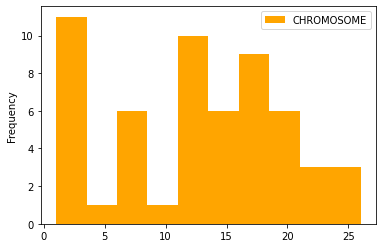

In [30]:
Agenome.plot(kind="hist",color='orange') # Grafico de barras

<AxesSubplot:xlabel='ID'>

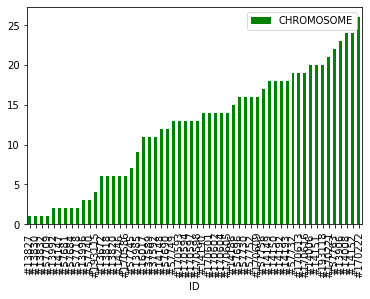

In [31]:
Agenome.plot(x="ID",kind="bar",color='green') # Grafico de los ID segun el cromosoma